<a href="https://colab.research.google.com/github/lmoghimi/personal-processing/blob/main/xrd_analysis_Lauren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import heapq

# timestamps = ['primary-1', ]
shift = True            #
get_timestamps = True
ntimestamps = 5
#ntimestamps_depths
lw = 0.75 #linewidth
userdir = "/content/drive/Shareddrives/leoradm_group/NSLS-II_202403"
scriptdir = os.path.join(userdir, 'userScripts')

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
#peak positions for reference
wavelength = 0.1824 #angstrom
'''
ref_tth_fe = [5.205, 9.022, 7.364, 10.421, 11.656, 12.772, 13.801, 14.759] #2theta
ref_d_fe = 0.5*wavelength/np.sin(np.radians(np.divide(ref_tth_fe,2))) #conversion to d
ref_q_fe = 2*np.pi/ref_d_fe #conversion to q
'''
ref_q_fe = [3.128, 5.419, 4.424, 6.995, 8.277, 6.257, 7.663]
#lincol_fe='tab:green' #iron
lincol_fe='tab:brown'

'''
ref_tth_w = [4.833, 6.837, 4.185, 8.019, 10.820, 8.376, 11.856, 10.545] #remove 3rd number if plot in tth
ref_d_w = 0.5*wavelength/np.sin(np.radians(np.divide(ref_tth_w,2)))
ref_q_w = 2*np.pi/ref_d_w
'''
ref_q_w = [2.905, 4.108, 2.516, 4.817, 6.495, 5.031, 7.115, 6.331, 8.715, 8.593, 7.547, 8.216, 5.810]
#lincol_w='tab:red' #wustite
lincol_w='tab:pink'

'''
ref_tth_m = [4.145, 7.083, 6.520, 3.540, 9.639, 5.019, 6.143, 8.324, 10.846] #remove 1st one if plot in tth
ref_d_m = 0.5*wavelength/np.sin(np.radians(np.divide(ref_tth_m,2)))
ref_q_m = 2*np.pi/ref_d_m
'''
ref_q_m = [2.4783, 2.5973, 4.2458, 3.8889, 2.1214, 2.9982, 5.7584, 3.6680, 1.2887, 4.9086]
#lincol_m='tab:purple' #magnetite
lincol_m='tab:green'

'''
ref_tth_h = [3.870, 4.150, 6.167, 5.675, 7.033, 7.190, 2.837, 7.973] #remove 2nd number if plot in tth
ref_d_h = 0.5*wavelength/np.sin(np.radians(np.divide(ref_tth_h,2)))
ref_q_h = 2*np.pi/ref_d_h
'''
ref_q_h = [2.4985, 2.3135, 3.7118, 4.3288, 3.41365, 4.2259, 1.6965, 2.8481, 4.8017, 3.92775, 4.9868, 5.6860, 5.5009, 5.9533, 6.5394]
#lincol_h='tab:orange' #hematite
lincol_h='tab:cyan'

lincol_h_ore = 'tab:purple'

lincol_magh='tab:olive' #maghemite

lincol_qz = 'tab:gray' #quartz

#lincol_wf = 'tab:blue' #sets the line color for the waterfall series
#lincol_wf = 'navy'

#Would you like to save the plots? Enter y/n
response = "n" ##### at some point it would be nice to make this pop up as a prompt so that we don't forget to change the response
xrd_type = "q" ##### d or tth or q. also make this pop up as a prompt

Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run49_hematite_pellet_H2_blue/integration/run49_hematite_pellet_H2_blue_20240328-151317_7f2dca_primary-1_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run49_hematite_pellet_H2_blue/integration/run49_hematite_pellet_H2_blue_20240328-151317_7f2dca_primary-31_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run49_hematite_pellet_H2_blue/integration/run49_hematite_pellet_H2_blue_20240328-151317_7f2dca_primary-62_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run49_hematite_pellet_H2_blue/integration/run49_hematite_pellet_H2_blue_20240328-151317_7f2dca_primary-93_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run49_hematite_pellet_H2_blue/integration/run49_hematite_pellet_H2_blue_20240328-151317_7f2dca_primary-124_mean_tth.chi
Showi

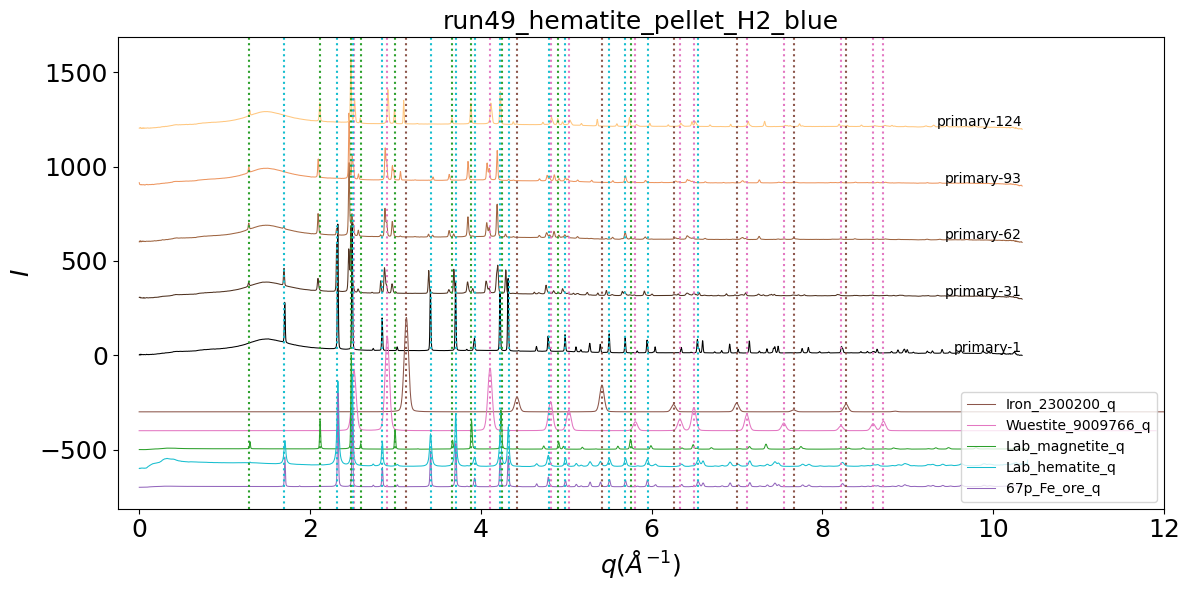

In [60]:
#create waterfall plot for in-situ scans
#for run in ['run49','run50','run51', 'run52', 'run53', 'run54', 'run55', 'run56', 'run57', 'run58', 'run59']:
#for run in ['run60','run61', 'run62', 'run63', 'run64', 'run65']:
for run in ['run49']:

    ###################### parsing the filename
    tiffdir = os.path.join(userdir, 'tiff_base')
    # print(userdir, tiffdir)
    runslist = glob.glob(tiffdir + '/*')
    # print(runslist)
    runsdict = {}
    for run_item in runslist:
        run_number = os.path.basename(run_item).split('_')[0]
        runsdict[run_number] = run_item
    # print(runsdict)

    file_pattern = os.path.join(runsdict[run], 'integration', '*_mean_tth.chi')
    expname = os.path.basename(runsdict[run])
    # print(file_pattern)
    filelist = glob.glob(file_pattern)
    # print(filelist)
    filedict = {}
    for filename in filelist:
        file_parse = os.path.basename(filename).split('_')
        if not ('ss' in file_parse or 'stg2' in file_parse):
            file_number = file_parse[-3] # this takes the primary number
            filedict[file_number] = filename
            # ntimestamps = 13
        # else:
        #     file_number = file_parse[-3]
        #     filedict[file_number] = filename
        # print(file_number, filename)

    ################# grab ntimestamps curves (equally spacing in time)
    if get_timestamps:
        timestamps = ['primary-%d'%k for k in np.linspace(1, len(filedict)-1, ntimestamps).astype(int)]

    ################# plotting setting
    figsize = (12, 6)
    fs = 18
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True) #this is key for "hold on"!!!!

    num_of_lines = len(timestamps)
    lincol_gradient = iter(cm.copper(np.linspace(0,1,num_of_lines))) #Wistia, copper, and autumn are nice gradients
    counting = 0
    ################ plotting selected timestamps
    for iv, timestamp in enumerate(timestamps):
        filename = filedict[timestamp]
        print('Loading file', filename)
        rawdata = np.loadtxt(filename)
        tth = rawdata[:, 0]
        d = 0.5*wavelength/np.sin(np.radians(tth/2)) #Bragg's law in angrstrom
        q = 2*np.pi/d
        I = rawdata[:, 1]
        I = I + iv * 300
        #I = I + iv * 100 #iv is basically the index number for the scan. this makes a waterfall plot
        # I = I/I.max() + 0.25 * iv
        #ax.plot(d, I, label=timestamp, color = lincol_wf, linewidth = lw)
        #ax.plot(d, I, color = lincol_wf, linewidth = lw)


        c=next(lincol_gradient)
        ax.plot(q, I, color = c, linewidth = lw)
        #ax.plot(tth, I, label=timestamp) #####
        #ax.text(d[-1], I[-1], timestamp, ha='right', va='bottom')
        ax.text(q[-1], I[-1], timestamp, ha='right', va='bottom')
        #ax.text(tth[-1], I[-1], timestamp, ha='left', va='bottom') #####

        counting = counting + 1

    ######### load multiple reference files, Yifan, 2024/4/12
    #ref_phases = ['SU_55Fe_S3_20231113-123848_ffaed2_primary-1_mean_q','SU_Lmag_S1_20231113-123625_d9ddff_primary-1_mean_q','SU_Lhem_S2_20231113-123737_848648_primary-1_mean_q','SU_67p1Fe_S6_20231113-124225_d3d593_primary-1_mean_q']
    #ref_phases = ['Iron_2300200', 'Wuestite_9009766','Magnetite_1528612','Hematite_1011240']
    ref_phases = ['Iron_2300200_q', 'Wuestite_9009766_q','Lab_magnetite_q','Lab_hematite_q','67p_Fe_ore_q']
    #ref_phases = ['Iron_2300200', 'Wuestite_9009766','Magnetite_1528612','Hematite_1011240','Maghemite_9006316']
    #color_ref_phases = [lincol_fe, lincol_m, lincol_h, lincol_h_ore] #setting the line colors for the reference files. these are predetermined in the previous code cell
    #color_ref_phases = [lincol_fe, lincol_w, lincol_m, lincol_h]
    color_ref_phases = [lincol_fe, lincol_w, lincol_m, lincol_h, lincol_h_ore]
    ref_shift_y = -100
    for i_phase, ref_phase in enumerate(ref_phases):
        reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt')
        refdata = np.loadtxt(reffile)
        #tth_ref = refdata[:, 0]
        q_ref = refdata[:, 0]
        #d_ref = 0.5*wavelength/np.sin(np.radians(tth_ref/2)) #convert to d-spacing
        #q_ref = 2*np.pi/d_ref
        I_ref = (refdata[:, 1] - refdata[0, 1]) #"grounding" the data
        '''
        largest = heapq.nlargest(2, I_ref) #find the second max value, which we will use for normalization
        print(largest)
        I_ref = I_ref/largest[1] + ref_shift_y*(i_phase + 1) -200
        '''
        sensitivity = 500 #the larger the value, the more prominent the peaks
        I_ref = I_ref/(I_ref.max()/sensitivity)  + ref_shift_y*(i_phase + 1) -200
        #ax.plot(d_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])
        ax.plot(q_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])
        #ax.plot(tth_ref, I_ref, label= ref_phase) #####
        #ax.plot(tth_ref, I_ref, label='Ref_' + ref_phase)
        #ax.text(tth_ref[-1], I_ref[-1], ref_phase, ha='left', va='bottom')

    #xlim_left, xlim_right = 0.5, 6 #for d
    #xlim_left, xlim_right = -0.25, 20 #for tth #####
    xlim_left, xlim_right = -0.25, 12 #for q
    ax.set_xlim(xlim_left, xlim_right)
    ax.legend(loc='lower right')
    #ax.set_xlabel(r'$d  ({\AA})$', fontsize=fs)
    ax.set_xlabel(r'$q  ({\AA}^{-1})$', fontsize=fs)
    #ax.set_xlabel(r'$2\theta (\degree)$', fontsize=fs) #####
    ax.set_ylabel(r'$I$', fontsize=fs)
    ax.set_title(expname, fontsize=fs)
    ax.tick_params(labelsize=fs)
    #ax.set_yticklabels([]) #turns off tick labels for vertical axis

################# plot vertical lines for the reference phase peaks
    for i_vert_line in ref_q_fe: #plot the vertical lines
    #for i_vert_line in ref_tth_fe:
        plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_fe)

    for i_vert_line in ref_q_w:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_w)

    for i_vert_line in ref_q_m:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_m)

    for i_vert_line in ref_q_h:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_h)

 ########## save settings
    if response == "y":
      print("Saving the file...!")
      fname_typ = 'wf_'+ xrd_type + '_' + expname + '.png' #wf = waterfall
      save_loc = os.path.join(userdir, 'userAnalysis' + '/' + 'waterfallPlots'+ '/')
      if not os.path.isdir(save_loc):
          os.makedirs(save_loc)
      plt.savefig(save_loc + fname_typ)
    elif response == "n":
      print("Showing the plot without saving...")
      plt.show()
    else: print("Please enter yes or no.")

<ipython-input-25-0e6cbdc8b63b>:29: RuntimeWarning: divide by zero encountered in divide
  d_ref = 0.5*wavelength/np.sin(np.radians(tth_ref/2)) #convert to d-spacing


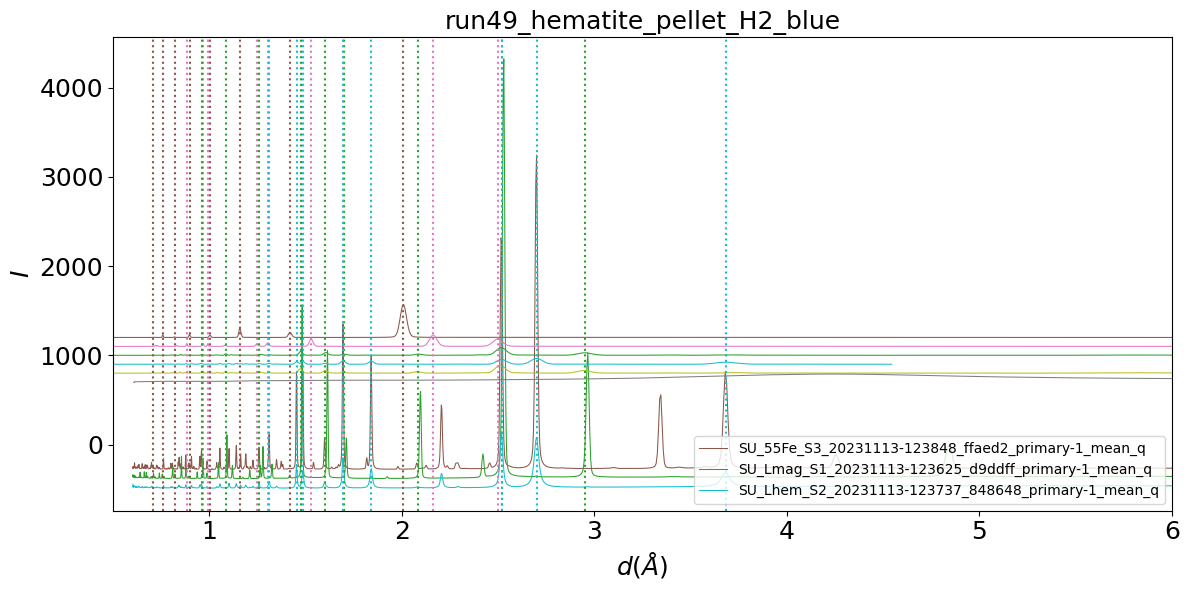

In [ ]:
#seeing how the reference files compare
'''
fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
######### load multiple reference files
ref_phases_2 = ['SU_55Fe_S3_20231113-123848_ffaed2_primary-1_mean_q','SU_Lmag_S1_20231113-123625_d9ddff_primary-1_mean_q','SU_Lhem_S2_20231113-123737_848648_primary-1_mean_q']
ref_phases_1 = ['Iron_2300200', 'Wuestite_9009766','Magnetite_1528612','Hematite_1011240','Maghemite_9006316','quartz_run53']
color_ref_phases_2 = [lincol_fe, lincol_m, lincol_h] #setting the line colors for the reference files. these are predetermined in the previous code cell
color_ref_phases_1 = [lincol_fe, lincol_w, lincol_m, lincol_h, lincol_magh, lincol_qz]
ref_shift_y = -100
for i_phase, ref_phase in enumerate(ref_phases_2):
    reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt')
    refdata = np.loadtxt(reffile)
    #tth_ref = refdata[:, 0]
    q_ref = refdata[:, 0]
    #d_ref = 0.5*wavelength/np.sin(np.radians(tth_ref/2)) #convert to d-spacing
    d_ref = 2*np.pi/q_ref
    I_ref = refdata[:, 1] - refdata[0, 1] + ref_shift_y*(i_phase + 1) -200
    # I_ref = I_ref/I_ref.max() - 1
    ax.plot(d_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases_2[i_phase])
    #ax.plot(tth_ref, I_ref, label= ref_phase) #####
    #ax.plot(tth_ref, I_ref, label='Ref_' + ref_phase)
    #ax.text(tth_ref[-1], I_ref[-1], ref_phase, ha='left', va='bottom')

for i_phase, ref_phase in enumerate(ref_phases_1):
    reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt')
    refdata = np.loadtxt(reffile)
    tth_ref = refdata[:, 0]
    #q_ref = refdata[:, 0]
    d_ref = 0.5*wavelength/np.sin(np.radians(tth_ref/2)) #convert to d-spacing
    #d_ref = 2*np.pi/q_ref
    I_ref = refdata[:, 1] - refdata[0, 1] + ref_shift_y*(i_phase + 1) -200 +1500
    # I_ref = I_ref/I_ref.max() - 1
    ax.plot(d_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases_1[i_phase])
    #ax.plot(tth_ref, I_ref, label= ref_phase) #####
    #ax.plot(tth_ref, I_ref, label='Ref_' + ref_phase)
    #ax.text(tth_ref[-1], I_ref[-1], ref_phase, ha='left', va='bottom')


xlim_left, xlim_right = 0.5, 6 #for d
#xlim_left, xlim_right = -0.25, 20 #for tth #####
ax.set_xlim(xlim_left, xlim_right)
ax.legend(loc='lower right')
ax.set_xlabel(r'$d  ({\AA})$', fontsize=fs)
#ax.set_xlabel(r'$2\theta (\degree)$', fontsize=fs) #####
ax.set_ylabel(r'$I$', fontsize=fs)
ax.set_title(expname, fontsize=fs)
ax.tick_params(labelsize=fs)
#ax.set_yticklabels([]) #turns off tick labels for vertical axis

################# plot vertical lines for the reference phase peaks
for i_vert_line in ref_d_fe: #plot the vertical lines
#for i_vert_line in ref_tth_fe:
    plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_fe)

for i_vert_line in ref_d_w:
    plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_w)

for i_vert_line in ref_d_m:
    plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_m)

for i_vert_line in ref_d_h:
    plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_h)
plt.show()
'''

13
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51_hematite_pellet_H2_blue_take3/integration/run51_hematite_pellet_H2_blue_take3_20240328-162127_eb6c31_ss_stg2_y_25,80mm_primary-1_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51_hematite_pellet_H2_blue_take3/integration/run51_hematite_pellet_H2_blue_take3_20240328-162127_eb6c31_ss_stg2_y_25,80mm_primary-1_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51_hematite_pellet_H2_blue_take3/integration/run51_hematite_pellet_H2_blue_take3_20240328-162127_eb6c31_ss_stg2_y_25,90mm_primary-2_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51_hematite_pellet_H2_blue_take3/integration/run51_hematite_pellet_H2_blue_take3_20240328-162127_eb6c31_ss_stg2_y_26,00mm_primary-3_mean_tth.chi
Loading file /content/drive/Shareddrives/leoradm_group/NSLS-II_202403/tiff_base/run51

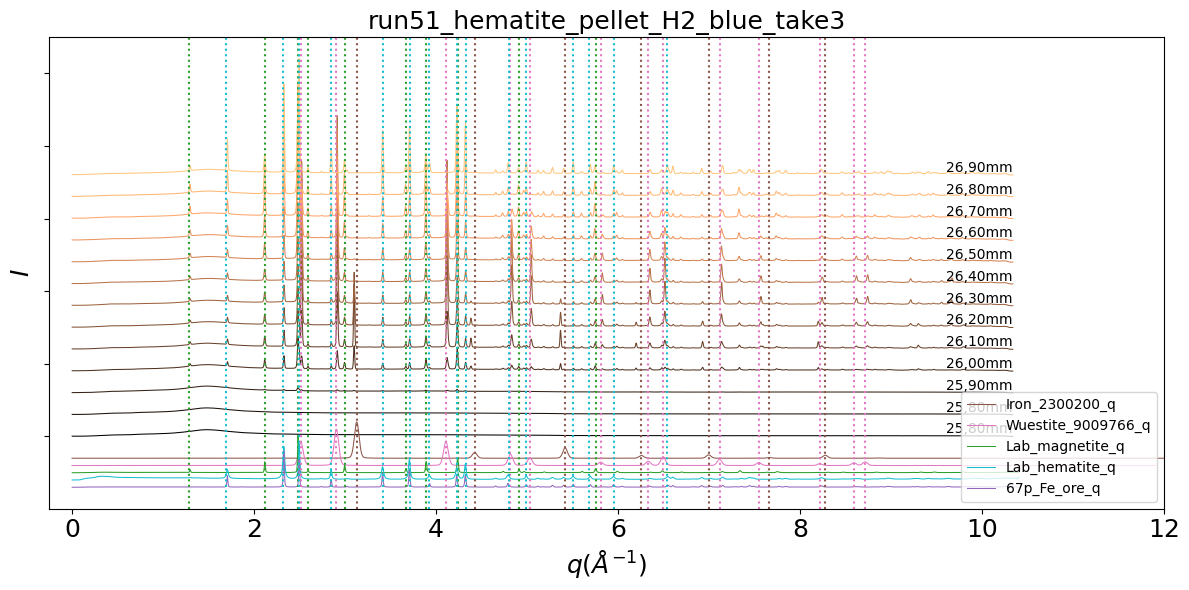

In [70]:
#create waterfall plot for depth scan series

#for run in ['run49','run50','run51', 'run52', 'run53', 'run54', 'run55', 'run56', 'run57', 'run58', 'run59']:
#for run in ['run60','run61', 'run62', 'run63', 'run64', 'run65']:
for run in ['run51']:

    ###################### parsing the filename
    tiffdir = os.path.join(userdir, 'tiff_base')
    # print(userdir, tiffdir)
    runslist = glob.glob(tiffdir + '/*')
    # print(runslist)
    runsdict = {}
    for run_item in runslist:
        run_number = os.path.basename(run_item).split('_')[0]
        runsdict[run_number] = run_item

    file_pattern = os.path.join(runsdict[run], 'integration', '*_mean_tth.chi')
    expname = os.path.basename(runsdict[run])
    # print(file_pattern)
    filelist = glob.glob(file_pattern)
    # print(filelist)
    filedict = {}
    count = 0 #counts number of files that satisfy the following condition
    for filename in filelist: #selects for ystg files
        file_parse = os.path.basename(filename).split('_')
        if ('ss' in file_parse or 'stg2' in file_parse): #select for y scans
            file_number = file_parse[-3] # this takes the primary number
            filedict[file_number] = filename
            count = count + 1
        # else:
        #     file_number = file_parse[-3]
        #     filedict[file_number] = filename
        # print(file_number, filename)
    print(count)
    ################# grab nxxxxstamps curves (equally spacing in xxxx)
    if get_timestamps:
        depthstamps = ['primary-%d'%k for k in np.linspace(1, len(filedict)-1, count).astype(int)]

    ################# plotting setting
    figsize = (12, 6)
    fs = 18
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)

    num_of_lines = len(depthstamps)
    lincol_gradient = iter(cm.copper(np.linspace(0,1,num_of_lines))) #Wistia, copper, and autumn are nice gradients
    counting = 0
    ################ plotting selected depthstamps
    for iv, depthstamp in enumerate(depthstamps):
        filename = filedict[depthstamp]
        print('Loading file', filename)
        ############################# Extract depth ############################
        splitfile = filename.split('_')
        depth_str = splitfile[-4]          # depth value
        ########################################################################
        rawdata = np.loadtxt(filename)
        tth = rawdata[:, 0]
        d = 0.5*wavelength/np.sin(np.radians(tth/2)) #Bragg's law in angrstrom
        q = 2*np.pi/d
        I = rawdata[:, 1]
        I = I + iv * 300
        #I = I + iv * 100 #iv is basically the index number for the scan. this makes a waterfall plot
        # I = I/I.max() + 0.25 * iv
        ################### label by depth ###############################
        c=next(lincol_gradient)
        #ax.plot(d, I, label='ss_stg2_y_' + depth_str, color=lincol_wf)
        ax.plot(q, I, color=c, linewidth= lw)
        ax.text(q[-1], I[-1], depth_str, ha='right', va='bottom')
        ##### for tth too
        #ax.text(tth[-1], I[-1], depth_str, ha='left', va='bottom') #####
        ##################################################################
        counting = counting + 1


    ######### Changed to load multiple reference files, Yifan, 2024/4/12
    ref_shift_y = -100
    for i_phase, ref_phase in enumerate(ref_phases):
        reffile = os.path.join(userdir, 'userScripts', 'xrd_profiles', ref_phase + '.txt')
        refdata = np.loadtxt(reffile)
        q_ref = refdata[:, 0]
        I_ref = (refdata[:, 1] - refdata[0, 1]) #"grounding" the data

        sensitivity = 500 #the larger the value, the more prominent the peaks
        I_ref = I_ref/(I_ref.max()/sensitivity)  + ref_shift_y*(i_phase + 1) -200
        ax.plot(q_ref, I_ref, label= ref_phase, linewidth= lw, color= color_ref_phases[i_phase])
        #ax.plot(tth_ref, I_ref, label= ref_phase) #####
        #ax.plot(tth_ref, I_ref, label='Ref_' + ref_phase)
        #ax.text(tth_ref[-1], I_ref[-1], ref_phase, ha='left', va='bottom')

    xlim_left, xlim_right = -0.25, 12 #for q
    ax.set_xlim(xlim_left, xlim_right)
    ax.legend(loc='lower right')
    ax.set_xlabel(r'$q  ({\AA}^{-1})$', fontsize=fs)
    #ax.set_xlabel(r'$2\theta (\degree)$', fontsize=fs) #####
    ax.set_ylabel(r'$I$', fontsize=fs)
    ax.set_title(expname, fontsize=fs)
    ax.tick_params(labelsize=fs)
    ax.set_yticklabels([]) #turns off tick labels for vertical axis


################# plot vertical lines for the reference phase peaks

    #define the lines you want to plot for each phase
    for i_vert_line in ref_q_fe: #plot the vertical lines
    #for i_vert_line in ref_tth_fe:
        plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_fe)

    for i_vert_line in ref_q_w:
        plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_w)

    for i_vert_line in ref_q_m:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_m)

    for i_vert_line in ref_q_h:
            plt.axvline(x=i_vert_line, linestyle='dotted', color=lincol_h)

 ##########
    if response == "y":
      print("Saving the file...!")
      fname_typ = 'ds_'+ xrd_type + '_' + expname + '.png' #ds = depth scan
      save_loc = os.path.join(userdir, 'userAnalysis' + '/' + 'depthScanPlots'+ '/')
      if not os.path.isdir(save_loc):
          os.makedirs(save_loc)
      plt.savefig(save_loc + fname_typ)
    elif response == "n":
      print("Showing the plot without saving...")
      plt.show()
    else: print("Please enter yes or no.")

PNG (1200, 600) RGBA
PNG (1200, 600) RGBA


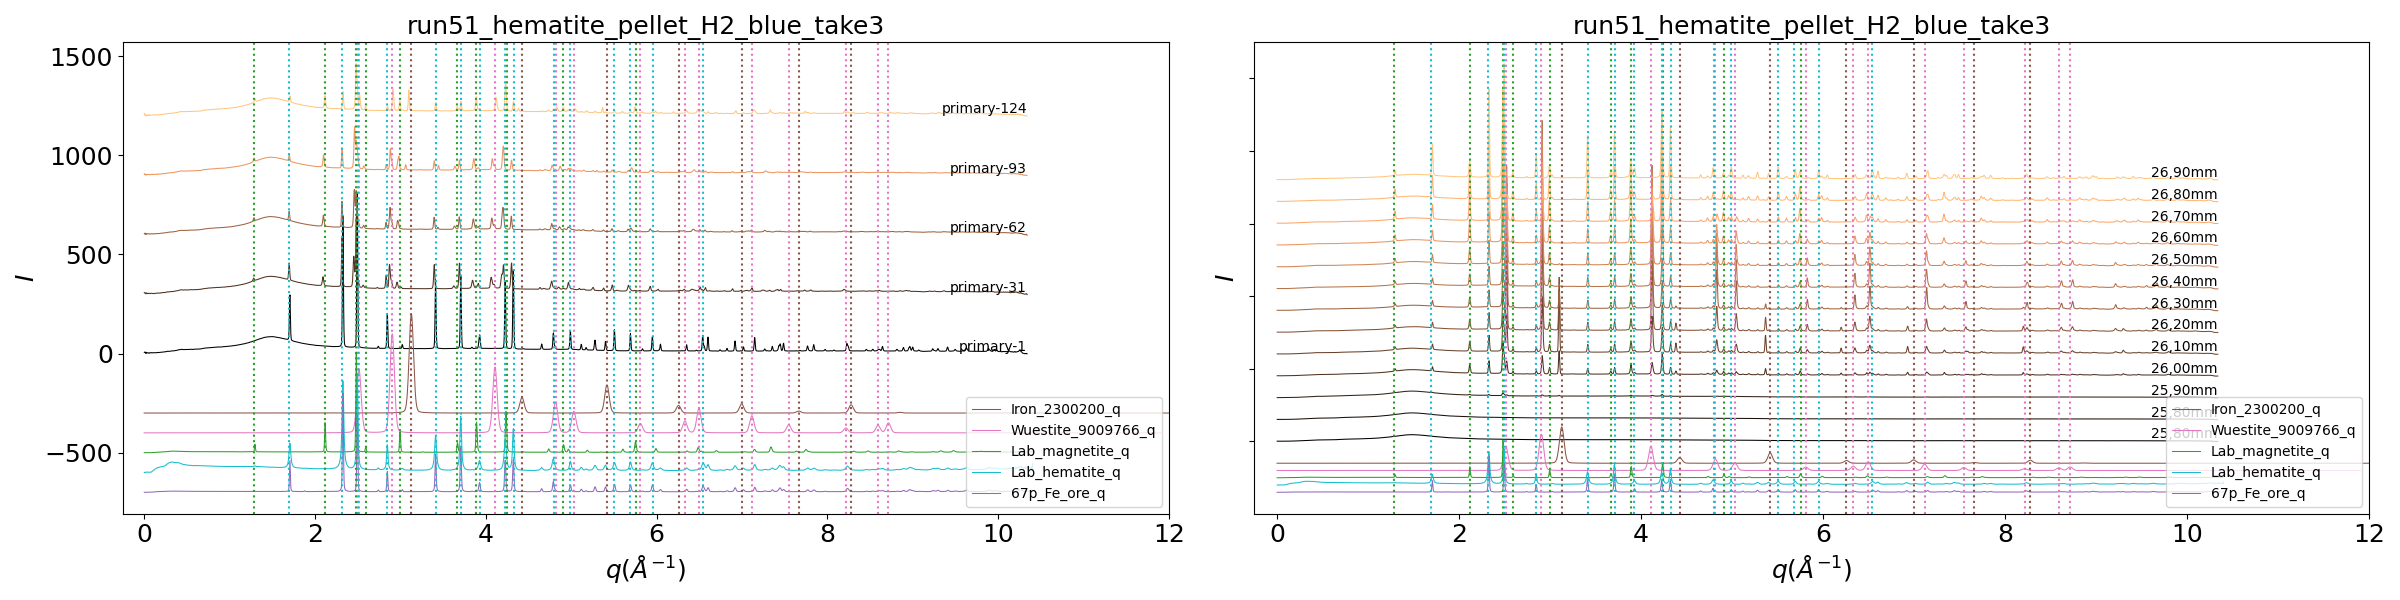

In [92]:
#stitching together images
#reference: https://pillow.readthedocs.io/en/latest/handbook/tutorial.html#cutting-pasting-and-merging-images
from PIL import Image
### input the names of the files that you want to join

is_fn = 'wf_q_run51_hematite_pellet_H2_blue_take3.png' ###
ds_fn = 'ds_q_run51_hematite_pellet_H2_blue_take3.png' ###

ispath = os.path.join(userdir, 'userAnalysis' + '/' + 'waterfallPlots'+ '/')
fp = os.path.join(ispath, is_fn)
im1 = Image.open(fp)
print(im1.format, im1.size, im1.mode)
#im1.show()

dspath = os.path.join(userdir, 'userAnalysis' + '/' + 'depthScanPlots'+ '/')
fp = os.path.join(dspath, ds_fn)
im2 = Image.open(fp)
print(im2.format, im2.size, im2.mode)
#im2.show()

def merge(im1, im2):
    w = im1.size[0] + im2.size[0]
    h = max(im1.size[1], im2.size[1])
    im = Image.new("RGBA", (w, h))

    im.paste(im1)
    im.paste(im2, (im1.size[0], 0))

    return im
    im.show()
    im.save(dspath + "collage.png")

merge(im1, im2)

In [ ]:
#create a video
import cv2
image_folder = save_loc
video_name = 'test_video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

Start time: 2023-12-14 20:21:54-08:00 delta t: 3

Timestamp from BNL: 2023-12-14 23:43:16.100371-05:00


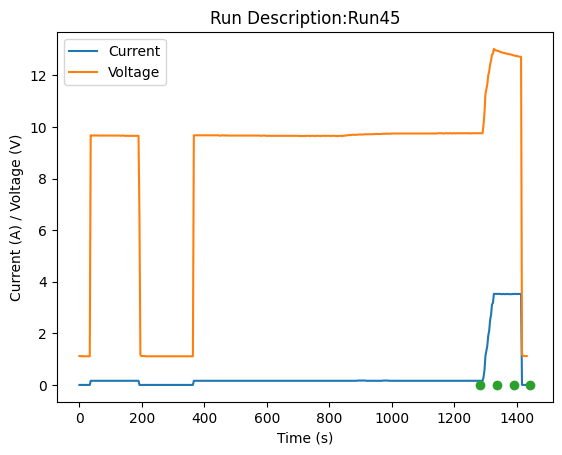

In [ ]:
### generating laser plot figure
import time
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import timedelta, timezone

userdir = "/content/drive/Shareddrives/leoradm_group/NSLS-II_202312"
scriptdir = os.path.join(userdir, 'userScripts')
logfile = os.path.join(scriptdir, 'logfiles/LOG-Dec.14.2023-08.45.38_Run45.csv') ##### Run45 is in PST!
with open(logfile, 'r') as f:
    line = f.readline()
    data = []
    while line != '':
        line_tag = line.split(':')[0]
        if line_tag == 'Description':
            run_number = line.split()[-1]
        elif line_tag == 'StartTime':
            # start_time = parser.parse(':'.join(line.split(':')[1:]) + ' EST', tzinfos={'EST': timezone(-timedelta(hours=5))}) ################## For runs before 45
            start_time = parser.parse(':'.join(line.split(':')[1:]) + ' PST', tzinfos={'PST': timezone(-timedelta(hours=8))})   ################## For run 45 and after
        elif line_tag == 'Sampling':
            delta_t = int(line.split(':')[1][:-2])
        elif line_tag == 'Record':
            head_str = line.split(':')[1].split(',')
        elif line_tag == 'Rec':
            data_str = line.split(':')[1].split(',')
            data_line = [int(k) for k in data_str]
            data.append(data_line)
        line = f.readline()

print('Start time:', start_time, 'delta t:', delta_t)
print('')

log_table = os.path.join(scriptdir, 'table_csv_2024/sample_hematite_blue_vac_run45_ef4fe4_20240105_215121.csv') #####
with open(log_table, 'r') as f:
    line = f.readline()
    header = line.split(',')
    sequence = []
    timetable = []
    line = f.readline()
    while line != '':
        sequence.append(int(line.split(',')[0]))
        time_str = line.split(',')[1]
        time_est = parser.parse(time_str).replace(tzinfo=timezone.utc).astimezone(tz=timezone(-timedelta(hours=5)))
        timetable.append(time_est)
        line = f.readline()
    sequence = np.array(sequence)

print('Timestamp from BNL:', timetable[0])

record_times = [(k - start_time).total_seconds() for k in timetable]
# print(timetable[0] - start_time)
# print(timetable[0], timetable[1], timetable[1] - timetable[0])
# print(np.array(data))
# print(head_str)
rawdata = np.array(data)
t = rawdata[:, 0] * delta_t
V = rawdata[:, 1]/1000
I = rawdata[:, 2]/1000
fig, ax = plt.subplots()
ax.plot(t, I, t, V)
#RT = np.array(record_times)[[0, 121, 242, 364]] ##### these points are for run39
RT = np.array(record_times)[[0, 120, 241, 362]] ##### these points are for run45 !!remember to subtract 1 from the runs for python's indexing
ax.plot(RT, np.zeros(RT.size), 'o')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current (A) / Voltage (V)')
ax.legend(['Current', 'Voltage'])
ax.set_title('Run %s' % run_number)
plt.show()